In [1]:
import numpy as np
import sklearn
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt

In [2]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X , Y , classifier , test_idx_range =None, resolution=0.02):
  markers = ('o', 's', '^', '<', 'v')
  #colors = ('red', 'blue', 'lightgreen','gray',  'cyan')
  #cmap = ListedColormap(colors[:len(np.unique(Y))])
  cmap = plt.cm.Pastel2
  x1_min , x1_max = X[:,0].min() - 1 , X[:,0].max() + 1
  x2_min , x2_max = X[:,1].min() - 1 , X[:,1].max() + 1
  xx1 , xx2 = np.meshgrid(np.arange(x1_min , x1_max , resolution), np.arange(x2_min , x2_max , resolution))
  lab = classifier.predict(np.array([xx1.ravel() , xx2.ravel()]).T).reshape(xx1.shape)
  plt.contourf(xx1 ,  xx2 , lab ,alpha=0.2, cmap =cmap)

  for idx, cl in enumerate(np.unique(Y)):
    plt.scatter(X[Y==cl,0], X[Y==cl,1] , alpha = 0.8 ,c=[plt.cm.Pastel1(idx/(len(np.unique(Y))))] , marker = markers[idx])

In [3]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header =None , encoding = 'utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
X_proto = df.iloc[:,[2,3]].values
Y_proto = df.iloc[:,4].values
from sklearn.preprocessing import LabelEncoder
Y_proto = LabelEncoder().fit_transform(Y_proto)
Y_proto

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

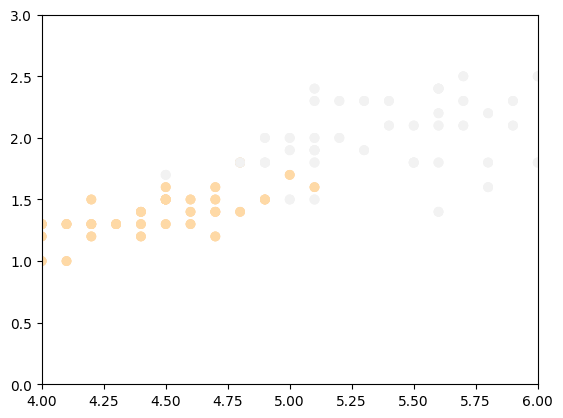

In [5]:
for ip , pv in enumerate(np.unique(Y_proto)):
  plt.scatter(X_proto[:,0] , X_proto[:,1] , c= Y_proto , cmap = 'Pastel1')
plt.xlim(4,6)
plt.ylim(0,3)
plt.show()

In [6]:
X_iris = df.iloc[:,[0,1]].values
Y_iris = df.iloc[:,4].values
Y_iris = Y_iris=='Iris-virginica'
#from sklearn.preprocessing import LabelEncoder
#Y_iris = LabelEncoder().fit_transform(Y_iris)
Y_iris

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
svc_clf = make_pipeline(sklearn.preprocessing.StandardScaler(),
                        sklearn.svm.LinearSVC( C = 1. , random_state = 42))

In [8]:
from sklearn.model_selection import train_test_split
XI_train , XI_test , YI_train , YI_test = train_test_split(X_proto , Y_proto , test_size = 0.3 , shuffle = True , stratify = Y_iris)
XI_train.shape , XI_test.shape

((105, 2), (45, 2))

In [9]:
svc_clf.fit(XI_train , YI_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=42))])

In [10]:
svc_clf.predict(XI_train[:4])

array([0, 0, 1, 0])

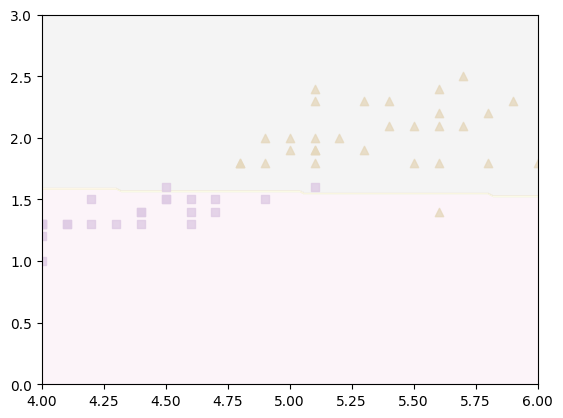

In [11]:
plot_decision_regions(XI_train , YI_train, classifier = svc_clf)
plt.xlim(4,6)
plt.ylim(0,3)
plt.show()

In [12]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

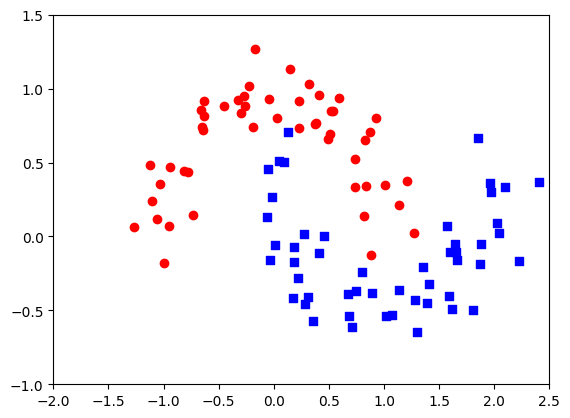

In [13]:
X_moon , Y_moon = make_moons(n_samples = 100 , noise = 0.15, random_state = 42)
from matplotlib.colors import ListedColormap
markers = ('o', 's', '^', 'v' ,'<')
colors = ('red', 'blue', 'lightgreen','gray',  'cyan')
cmap = ListedColormap(colors[:len(np.unique(Y_moon))])
for mi , mv in enumerate(np.unique(Y_moon)):
  plt.scatter(X_moon[Y_moon==mv,0], X_moon[Y_moon==mv,1], c = colors[mi] , marker = markers[mi])
plt.xlim(-2,2.5)
plt.ylim(-1 , 1.5)
plt.show()

In [14]:
svc_clf_poly = make_pipeline(sklearn.preprocessing.PolynomialFeatures(degree = 3),
                              sklearn.preprocessing.StandardScaler(),
                              sklearn.svm.LinearSVC(C=10 , max_iter = 10_000, random_state = 42))

In [15]:
svc_clf_poly.fit(X_moon , Y_moon)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

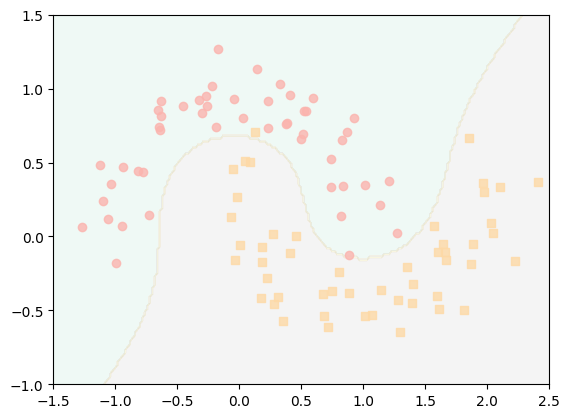

In [16]:
plot_decision_regions(X_moon, Y_moon, classifier = svc_clf_poly )
plt.xlim(-1.5 , 2.5)
plt.ylim(-1., 1.5)
plt.show()

Gaussian Radial Bias Function kernel SVC:
basically the radial bias function calculates how similar a point is to any point in the space b+y measuring the Eucliden distancec between those points . the lower the distance the higher the similarity which is calculated by the rbf kernel function . now the points of comparison are basically made everywhere in the sample space . so esssentially you calculate the similarity of points around a point the in input/ training sample space . and for every point we get a radial (gaussian radial ) region around a point which we use as a similarity region OR a decision region . so if a point falls in that region around a input sample then it is classified to be n its class. this distance is controlled using a parameter gamma in the rbf kernel equation . the higher the gamma the smaller the radial distance around a point where we can classify any point to be in the same class . so this means higher the gamma tighter the decision region . So when you do this for the entire training set , you simply sum up all these gaussian radial spaces / decision regions to get the complete decision boundary .

In [17]:
svm_svckernel_clf = make_pipeline(sklearn.preprocessing.StandardScaler(),
                                  sklearn.svm.SVC(kernel = 'rbf' , gamma = 2 , C= 1, random_state = 42))

In [18]:
svm_svckernel_clf.fit(X_moon, Y_moon)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, gamma=2, random_state=42))])

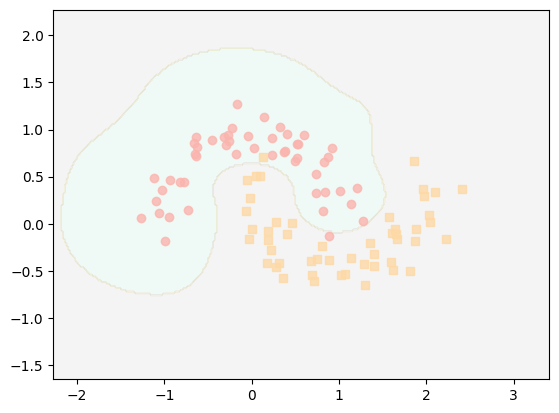

In [19]:
plot_decision_regions(X_moon, Y_moon, classifier = svm_svckernel_clf)

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtree_clf = sklearn.pipeline.make_pipeline(sklearn.preprocessing.StandardScaler(),
                                           sklearn.tree.DecisionTreeClassifier(max_depth = 2 , random_state = 42))

In [29]:
dtree_clf.fit(X_proto , Y_proto)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=2, random_state=42))])

In [30]:
from sklearn.tree import export_graphviz
export_graphviz(dtree_clf.steps[-1][1] ,
                out_file = 'dtree_analysis.dot',
                feature_names = ['Petal length (cm)' , 'Petal width (cm)'],
                class_names = np.unique((df.iloc[:,4].values)),
                rounded = True,
                filled = True)

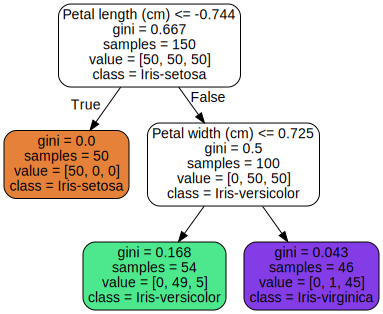

In [32]:
from graphviz import Source
Source.from_file('dtree_analysis.dot')

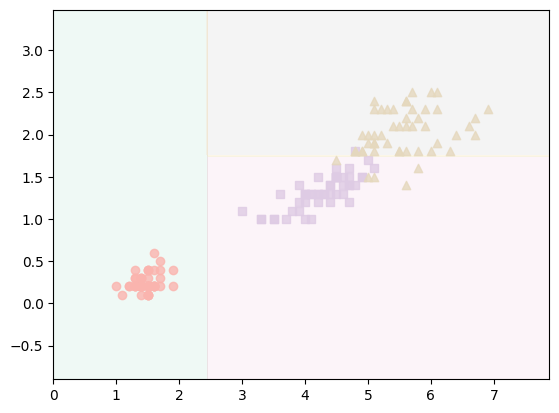

In [33]:
plot_decision_regions(X_proto, Y_proto , classifier = dtree_clf)